## Working with EEG data
We learned how to load basic information about CML experiments and experimental events. Next, we're going to load EEG/iEEG data that correspond to those events.

### What is EEG?
Before we get into the weeds, let's briefly review exactly what EEG is, how we collect it, and what we can learn from it. Much of this material is sourced from this paper by Pesaran, et al. (2018): https://www.nature.com/articles/s41593-018-0171-8

The fundamental signal detected by any electrical brain sensor is the **field potential**, or the change in extracellular voltage induced by aggregated electrical currents across a population of neurons. In other words, as neurons communicate with one another, ions flow across channels at synapses (and along the axon during action potentials). These ionic flows set up a difference in the electrical potential between two areas of brain tissue, which is detected by a sensor placed within the brain (iEEG/sEEG), on the cortical surface (ECoG), or on the scalp (EEG). 

Typically, we refer to the **local field potential (LFP)** when we're talking about field potentials detected by electrodes inserted directly into brain tissue -- such as stereo-EEG depth electrodes -- and **electrocorticography (ECoG)** when we're talking about field potentials detected by electrodes that sit on the surface of the brain. Often, you'll find both of these types of signals in one patient. 

<br>
<center>
<img src="https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fs41593-018-0171-8/MediaObjects/41593_2018_171_Fig1_HTML.jpg" width=400>
</center>

The exact neural source of a field potential is not always clear, and it can depend on the placement of an electrode relative to the underlying geometry of neurons and their component parts. For example, a scalp EEG electrode is detecting a field potential generated by the activity of millions of cells in a broad area of the brain near the electrode -- and filtered through the skull and scalp -- while a depth electrode placed in the hippocampus directly records the activity from only a few thousand cells.

The synchronized activity of many cells near an electrode gives rise to an **oscillation**, or a rhythmic fluctuation of the field potential at a particular frequency. The presence of an oscillation is thought to indicate the coordinated neural activity of (or inputs to) a given region, but their origins are multifactorial. Oscillations themselves can affect the firing of neurons, making them an important phenomenon to study in the context of cognition and behavior. We'll talk more about oscillations later. 

### Invasive Monitoring for Epilepsy Surgery

<center>
<img src="https://github.com/esolomon/PythonBootcamp2019/blob/master/figures/iEEG_methods-01.jpg?raw=true" width=700>
</center>

Why do we collect EEG? Noninvasive methods, such as scalp EEG and MEG, are safe to use on healthy people. But invasive recordings such as stereo-EEG and ECoG must be justified with a clinical need. Patients with medication-resistant epilepsy come to the hospital for surgical treatment of their epilepsy, in which epileptogenic brain tissue is ablated or removed. But in order to precisely localize this tissue, patients undergo monitoring during which EEG signals are recorded intracranially for several days or weeks, until sufficient seizure events are documented. 

* **(A)** shows a craniotomy, during which a part of the skull is removed so that a grid or strip electrode can be placed on the cortical surface. This method was more common several years ago, and comprises the bulk of early RAM and pre-RAM datasets. 
* **(B)** is a CT-MRI fusion depecting a depth electrode placed in the MTL. So-called "stereo-EEG" depth electrodes are far less invasive, since even a tiny hole in the skull is sufficient to slip one of these wires through. Nowadays, many patients are exclusively stereo-EEG. 

### Load the data

In [1]:
import numpy as np
import pandas as pd
import cmlreaders as cml

# We load the dataframe for all sessions.
df = cml.get_data_index()

# Specify which subject and experiment we want
sub = 'R1111M'
exp = 'FR1'

# Select the dataframes for our subject and experiment.
df_select = df[(df['subject']==sub) & (df['experiment']==exp)]
# Pick the first session
df_sess = df_select.iloc[0]

# Initialize data reader using session metadata
reader = cml.CMLReader(subject=df_sess['subject'], experiment=df_sess['experiment'], session=df_sess['session'],
                       localization=df_sess['localization'], montage=df_sess['montage'])

# For first session...
evs = reader.load("events")
word_evs = evs[evs['type']=='WORD']

#### Load subject electrodes

In [2]:
channels = reader.load("pairs")  #loading all bipolar pairs, but can use 'contacts' instead for non-rereferenced data
channels[:10]

,contact_1,contact_2,label,id,is_explicit,is_stim_only,type_1,type_2,avg.region,avg.x,...,wb.x,wb.y,wb.z,stein.region,stein.x,stein.y,stein.z,mni.x,mni.y,mni.z
0,1,9,LPOG1-LPOG9,lpog.1-lpog.9,False,False,G,G,middletemporal,-65.295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.28000,-24.47930,-25.704682
1,1,2,LPOG1-LPOG2,lpog.1-lpog.2,False,False,G,G,middletemporal,-66.140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.32435,-20.27770,-20.704405
2,2,10,LPOG2-LPOG10,lpog.2-lpog.10,False,False,G,G,middletemporal,-67.055,...,NaN,NaN,NaN,Left Middle Temporal Gyrus,NaN,NaN,NaN,-68.17790,-24.27370,-16.147723
3,2,3,LPOG2-LPOG3,lpog.2-lpog.3,False,False,G,G,middletemporal,-66.335,...,NaN,NaN,NaN,Left Middle Temporal Gyrus,NaN,NaN,NaN,-67.85235,-18.97405,-11.785856
4,3,4,LPOG3-LPOG4,lpog.3-lpog.4,False,False,G,G,superiortemporal,-63.665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.81390,-16.24680,-0.170758
5,3,11,LPOG3-LPOG11,lpog.3-lpog.11,False,False,G,G,superiortemporal,-66.210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.49205,-22.66135,-6.117569
6,4,5,LPOG4-LPOG5,lpog.4-lpog.5,False,False,G,G,postcentral,-60.490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.88315,-14.75105,11.296800
7,4,12,LPOG4-LPOG12,lpog.4-lpog.12,False,False,G,G,superiortemporal,-63.030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-64.42160,-20.69280,4.779624
8,5,6,LPOG5-LPOG6,lpog.5-lpog.6,False,False,G,G,postcentral,-58.595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.15850,-12.24788,20.745970
9,5,13,LPOG5-LPOG13,lpog.5-lpog.13,False,False,G,G,supramarginal,-61.135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.59895,-18.82055,16.364520


Some key attributes you may need in your analyses include: 
* label: The clinical label for each electrode, as determined in the hospital
* ind.region: The anatomical region using the Desikan-Killiany atlas. 
* ind.x/y/z: Electrode coordinates in individual FreeSurfer space. 
* avg.x/y/z: Electrode coordintes in average FreeSurfer space. 
* tal.x/y/z or mni.x/y/z: Coordinates in Talairach or MNI space. 
* stein.region or das.region: Manually-confirmed labels for MTL subfields (mostly). Talk to me offline about getting these labels for recent subjects.

(The x axis points to the right, the y axis to the front, and the z axis up.)

* For a full description of fields in 'pairs' or 'contacts' structures, see: https://github.com/pennmem/neurorad_pipeline/blob/master/RELEASE_NOTES.md
* For more information on brain coordinate systems, see: http://www.fieldtriptoolbox.org/faq/how_are_the_different_head_and_mri_coordinate_systems_defined/

**Exercise: Plot the distributions of 'ind' x, y, and z values for all of R1111Ms electrodes.**

## Loading iEEG/EEG Data

Loading EEG is pretty simple -- use your reader's **'load_eeg'** method, and pass it an events dataframe, when you want to start/stop the EEG clip (in ms), and the electrodes you want. Use a **'pairs'** dataframe for bipolar data (see below) or a **'contacts'** dataframe for unrereferenced data.

* Note that events and electrodes dataframes must be passed as slices, not individual rows. So index them like 'pairs[0:1]' or 'pairs.loc[0:1]' for the first electrode pair, not 'pairs.loc[0]'. Same goes for events!
* Unrereferenced data is **not available** for subjects collected on the RAM ENS system (marked as system 3 in the system_version column). The ENS inherently records in bipolar fashion (to mitigate stimulation artifact). Passing a 'contacts' structure should yield an error if this is the case. 

In [3]:
reader.load_eeg?

Signature:
reader.load_eeg(
    events: Optional[pandas.core.frame.DataFrame] = None,
    rel_start: int = None,
    rel_stop: int = None,
    scheme: Optional[pandas.core.frame.DataFrame] = None,
    clean: Optional[bool] = False,
)
Docstring:
Load EEG data.

Parameters
----------
events
    Events to load EEG epochs from. Incompatible with passing
    ``epochs``.
rel_start
    Start time in ms relative to passed event onsets. This parameter is
    required when passing events and not used otherwise.
rel_stop
    Stop time in ms relative to passed event onsets. This  parameter is
    required when passing events and not used otherwise.
scheme
    When specified, a bipolar scheme to rereference the data with
    and/or filter by channel. Rereferencing is only possible if the
    data were recorded in monopolar (a.k.a. common reference) mode.
    (Currently available for iEEG only.)
clean
    If True, load re-referenced, filtered, and ICA/LCF-cleaned version
    of data (currently avail

In [4]:
# Grab the EEG data
eeg_container = reader.load_eeg(events=evs, rel_start=0, rel_stop=1600, scheme=channels)
eeg = eeg_container.data
samplingrate = eeg_container.samplerate

/usr/global/miniconda/py310_23.1.0-1/envs/workshop_311/lib/python3.11/site-packages/cmlreaders/readers/eeg.py:563: UserWarning: Some events have eegoffset < 0 and will be dropped.
  warnings.warn("Some events have eegoffset < 0 and will be dropped.")


In [5]:
# The output from this mode is a numpy array of [events, electrodes, samples]
print(eeg.shape)

# Show the EEG data
print(eeg)


(764, 141, 800)
[[[  6153   6163   6173 ...   6080   6074   6067]
  [  7068   7064   7064 ...   7143   7134   7127]
  [ -4876  -4871  -4869 ...  -5025  -5020  -5012]
  ...
  [  7825   7827   7828 ...   7780   7780   7776]
  [-10137 -10133 -10133 ... -10249 -10249 -10246]
  [ -1432  -1435  -1437 ...  -1436  -1432  -1428]]

 [[  6172   6178   6180 ...   6037   6038   6032]
  [  7071   7089   7095 ...   6892   6887   6877]
  [ -4948  -4964  -4969 ...  -4818  -4809  -4797]
  ...
  [  7734   7732   7728 ...   7763   7763   7767]
  [-10265 -10265 -10265 ... -10234 -10233 -10233]
  [ -1429  -1429  -1433 ...  -1394  -1389  -1388]]

 [[  5855   5860   5871 ...   6159   6153   6153]
  [  7030   7031   7037 ...   7151   7145   7137]
  [ -4958  -4961  -4958 ...  -4958  -4958  -4957]
  ...
  [  7693   7699   7712 ...   7770   7769   7773]
  [-10164 -10166 -10170 ... -10205 -10210 -10221]
  [ -1413  -1416  -1419 ...  -1454  -1453  -1448]]

 ...

 [[  6131   6119   6109 ...   6194   6200   6192]
  [ 

In [6]:
# We can immediately filter by word events and channels,
# here selecting channels 0 through 4 (up to but not including the 5):

eeg_filt = eeg[word_evs.index, 0:5]

print(eeg_filt.shape)
print(eeg_filt)

(288, 5, 800)
[[[ 6193  6194  6202 ...  6306  6299  6296]
  [ 7132  7128  7120 ...  7166  7170  7174]
  [-4988 -4987 -4989 ... -4948 -4952 -4967]
  [ 3814  3817  3821 ...  3903  3889  3878]
  [-2088 -2088 -2087 ... -2487 -2492 -2495]]

 [[ 6255  6251  6257 ...  5965  5959  5950]
  [ 7177  7165  7165 ...  7013  7015  7018]
  [-4963 -4962 -4965 ... -5019 -5025 -5034]
  [ 3777  3777  3769 ...  3860  3855  3856]
  [-2045 -2045 -2053 ... -2205 -2209 -2215]]

 [[ 6011  5995  5983 ...  6338  6340  6344]
  [ 7025  7006  6993 ...  7096  7113  7135]
  [-4905 -4902 -4904 ... -4886 -4888 -4895]
  [ 3784  3785  3782 ...  3760  3762  3758]
  [-2196 -2199 -2206 ... -2086 -2109 -2124]]

 ...

 [[ 6658  6642  6631 ...  6269  6256  6248]
  [ 7302  7287  7286 ...  7322  7308  7300]
  [-4897 -4886 -4887 ... -4828 -4818 -4809]
  [ 3821  3825  3820 ...  4056  4055  4050]
  [-2071 -2079 -2089 ... -2571 -2564 -2559]]

 [[ 6055  6047  6042 ...  6104  6095  6084]
  [ 7137  7136  7139 ...  6991  6982  6979]
  [-

In [7]:
# You might instead want the EEG in a PTSA or MNE format.
# These two libraries will be very useful for later analyses.
eeg_ptsa = eeg_container.to_ptsa()
eeg_mne = eeg_container.to_mne()

Not setting metadata
764 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 24 columns


In [8]:
# We can select out word events and the first five channels using PTSA, just like the numpy array
eeg_ptsa_filt = eeg_ptsa[word_evs.index, channels.index[0:5]]

# Lets look at the resulting data
print(eeg_ptsa_filt)

<xarray.TimeSeries (event: 288, channel: 5, time: 800)>
array([[[ 6193,  6194,  6202, ...,  6306,  6299,  6296],
        [ 7132,  7128,  7120, ...,  7166,  7170,  7174],
        [-4988, -4987, -4989, ..., -4948, -4952, -4967],
        [ 3814,  3817,  3821, ...,  3903,  3889,  3878],
        [-2088, -2088, -2087, ..., -2487, -2492, -2495]],

       [[ 6255,  6251,  6257, ...,  5965,  5959,  5950],
        [ 7177,  7165,  7165, ...,  7013,  7015,  7018],
        [-4963, -4962, -4965, ..., -5019, -5025, -5034],
        [ 3777,  3777,  3769, ...,  3860,  3855,  3856],
        [-2045, -2045, -2053, ..., -2205, -2209, -2215]],

       [[ 6011,  5995,  5983, ...,  6338,  6340,  6344],
        [ 7025,  7006,  6993, ...,  7096,  7113,  7135],
        [-4905, -4902, -4904, ..., -4886, -4888, -4895],
        [ 3784,  3785,  3782, ...,  3760,  3762,  3758],
        [-2196, -2199, -2206, ..., -2086, -2109, -2124]],

       ...,

       [[ 6658,  6642,  6631, ...,  6269,  6256,  6248],
        [ 730

In [9]:
# We can also filter the eeg_mne for word events.
eeg_mne_filt = eeg_mne[word_evs.index]

# Then we can filter the eeg_mne_filt again for channels.
eeg_mne_filt = eeg_mne_filt.pick_channels(eeg_mne.ch_names[0:5])

# Lets observe the remaining dimensions
print(eeg_mne_filt.get_data().shape)

# And look at the numpy array of the remaining data
print(eeg_mne_filt.get_data())


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(288, 5, 800)
[[[ 6193.  6194.  6202. ...  6306.  6299.  6296.]
  [ 7132.  7128.  7120. ...  7166.  7170.  7174.]
  [-4988. -4987. -4989. ... -4948. -4952. -4967.]
  [ 3814.  3817.  3821. ...  3903.  3889.  3878.]
  [-2088. -2088. -2087. ... -2487. -2492. -2495.]]

 [[ 6255.  6251.  6257. ...  5965.  5959.  5950.]
  [ 7177.  7165.  7165. ...  7013.  7015.  7018.]
  [-4963. -4962. -4965. ... -5019. -5025. -5034.]
  [ 3777.  3777.  3769. ...  3860.  3855.  3856.]
  [-2045. -2045. -2053. ... -2205. -2209. -2215.]]

 [[ 6011.  5995.  5983. ...  6338.  6340.  6344.]
  [ 7025.  7006.  6993. ...  7096.  7113.  7135.]
  [-4905. -4902. -4904. ... -4886. -4888. -4895.]
  [ 3784.  3785.  3782. ...  3760.  3762.  3758.]
  [-2196. -2199. -2206. ... -2086. -2109. -2124.]]

 ...

 [[ 6658.  6642.  6631. ...  6269.  6256.  6248.]
  [ 7302.  7287.  7286. ...  7322.  7308.  7300.]
  [-4897. -4886. -4887. ... -4828. -4818. -4

Text(0.5, 1.0, 'Sample EEG trace')

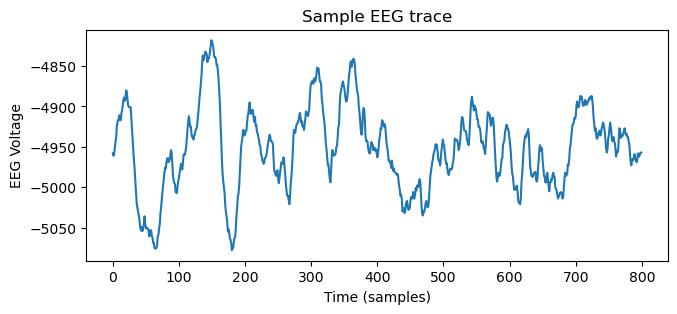

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot an example EEG trace
plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(eeg[2, 2, :])
plt.ylabel('EEG Voltage'); plt.xlabel('Time (samples)')
plt.title('Sample EEG trace')

This is the fundamental unit of EEG data analyses -- the EEG timeseries! Whether from scalp or intracranial, our core interest is understanding the properties of these timeseries relative to interesting behavioral or cognitive events. Typically, we understand EEG signals with **spectral decomposition**, which will be covered later.

EEG timeseries data from different subjects and contacts and time points can have wildly different voltage offsets and voltage scaling.  We can address these variations by **z-scoring**, which adjusts a set of data to give it a mean of 0 and a standard deviation of 1, bringing everything to a common offset and scale.  The mathematical definition of a Z-score:
$$
Z = \frac{x-\mu}{\sigma}
$$
where x is the observed value, $\mu$ is the mean, and $\sigma$ is the standard deviation.

/usr/global/miniconda/py310_23.1.0-1/envs/workshop_311/lib/python3.11/site-packages/cmlreaders/readers/eeg.py:563: UserWarning: Some events have eegoffset < 0 and will be dropped.
  warnings.warn("Some events have eegoffset < 0 and will be dropped.")


avg.region: cuneus
(288, 1, 850)
(288, 1, 850)


Text(0, 0.5, 'Z-scored Voltage')

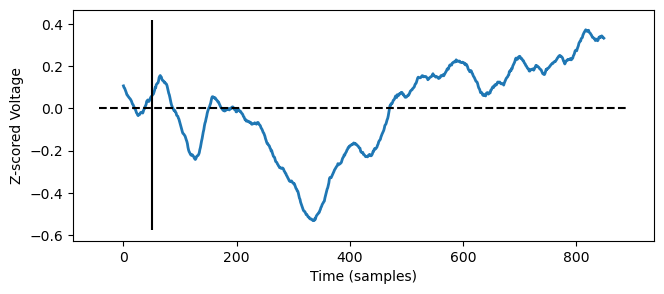

In [11]:
pairs = reader.load("pairs")

# load 1700ms long EEG events from 100ms before event to 1600ms after
eeg_container = reader.load_eeg(evs, -100, 1600, scheme=pairs)
eeg = eeg_container.data
sr = eeg_container.samplerate

# select word encoding events for channel 112 (as a slice), keeping events, channels, time
# channel 112 is in the cuneus, part of the occipital lobe
eeg = eeg[word_evs.index, 112:113]
print('avg.region:', pairs.iloc[112]['avg.region'])
print(eeg.shape)

# calculate mean (average over time and then event)
mu = np.mean(np.mean(eeg[:, 0, :], 1), 0)
# calculate standard deviation between events (first averaging over time)
std_ = np.std(np.mean(eeg[:, 0, :], 1), 0)

# z-score
zeeg = (eeg-mu)/std_
print(zeeg.shape)

# Plot the trace averaged across all events
plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(np.mean(zeeg[:, 0, :], 0), linewidth=2,)
plt.vlines([0.1*sr], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle='-', color='k')
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyle='--', color='k')
plt.xlabel('Time (samples)'); plt.ylabel('Z-scored Voltage')

### Referencing

Electrical potentials inherently reflect some kind of differential. In the case of EEG data, the voltage fluctuations we measure really reflect a difference between an electrode of interest and a "reference" electrode placed elsewhere (such as the mastoid or an arbitrary location in the brain). As such, noise on the reference electrode -- and other sources -- can contaminate our measurement of true neural signal in the raw data. 

To solve this, it is common to "re-reference" EEG data to mitigate sources of noise. We could have a whole discussion about different ways to re-reference data, and the advantages/disadvantages of each, but there are two common ways of re-referencing I'll mention here. 

The most common re-reference used in this lab is the **bipolar** reference, in which the signal from each channel is subtracted from its neighbor. The result is an estimate of a cleaner signal that putatively reflects activity at the midpoint of the two physical recording contacts (we sometimes call this midpoint a **virtual electrode**). The bipolar reference has several advantages: (1) it's very simple to implement, (2) it typically does a good job at removing widespread noise, and (3) it ensures that your re-referenced traces reflect activity that is very close to the original electrodes. 

(One downside is that bipolar re-referencing can actually reduce your ability to detect true neural signals, or mislocalize its origin, especially if two adjancent electrodes were detecting a common source of electrical activity.)

You may also encounter the **common average** reference, in which the average signal across all electrodes (or perhaps within a predefined anatomical region) is subtracted from each. This method is less likely to destroy local signals, and also does a good job removing widespread noise or reference noise, but can potentially contaminate originally-clean electrodes with unmitigated noise from a completely different part of the brain. 

Neither method is perfect, and there are more sophisiticated approaches out there. For the sake of this tutorial, we're going to focus on the bipolar reference. But it is often nice to try different referencing schemes in your analysis to ensure that your results don't change drastically from one to the other. 

<center>
<img src="http://www.bem.fi/book/13/fi/1303.gif">
</center>

In [12]:
# Let's examine the bipolar referencing used in the example data.
# The channels are as follows:
channels = reader.load("pairs")

channels[0:10]

,contact_1,contact_2,label,id,is_explicit,is_stim_only,type_1,type_2,avg.region,avg.x,...,wb.x,wb.y,wb.z,stein.region,stein.x,stein.y,stein.z,mni.x,mni.y,mni.z
0,1,9,LPOG1-LPOG9,lpog.1-lpog.9,False,False,G,G,middletemporal,-65.295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.28000,-24.47930,-25.704682
1,1,2,LPOG1-LPOG2,lpog.1-lpog.2,False,False,G,G,middletemporal,-66.140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.32435,-20.27770,-20.704405
2,2,10,LPOG2-LPOG10,lpog.2-lpog.10,False,False,G,G,middletemporal,-67.055,...,NaN,NaN,NaN,Left Middle Temporal Gyrus,NaN,NaN,NaN,-68.17790,-24.27370,-16.147723
3,2,3,LPOG2-LPOG3,lpog.2-lpog.3,False,False,G,G,middletemporal,-66.335,...,NaN,NaN,NaN,Left Middle Temporal Gyrus,NaN,NaN,NaN,-67.85235,-18.97405,-11.785856
4,3,4,LPOG3-LPOG4,lpog.3-lpog.4,False,False,G,G,superiortemporal,-63.665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.81390,-16.24680,-0.170758
5,3,11,LPOG3-LPOG11,lpog.3-lpog.11,False,False,G,G,superiortemporal,-66.210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.49205,-22.66135,-6.117569
6,4,5,LPOG4-LPOG5,lpog.4-lpog.5,False,False,G,G,postcentral,-60.490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.88315,-14.75105,11.296800
7,4,12,LPOG4-LPOG12,lpog.4-lpog.12,False,False,G,G,superiortemporal,-63.030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-64.42160,-20.69280,4.779624
8,5,6,LPOG5-LPOG6,lpog.5-lpog.6,False,False,G,G,postcentral,-58.595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.15850,-12.24788,20.745970
9,5,13,LPOG5-LPOG13,lpog.5-lpog.13,False,False,G,G,supramarginal,-61.135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.59895,-18.82055,16.364520


Compare contact_1, contact_2, and the dash separated pairs in the label column.  The bipolar referencing scheme works by subtracting contact_1 from contact_2, and recording that signal in the EEG file.  The brain regions and coordinates identified in the various columns are typically taken from the location in between the two electrodes which make up the bipolar pair.

**Generate a time series plot for R1111M of a bipolar pair in the superior temporal gyrus for the first word recall event of the first session**

## Event Related Potentials (ERPs)

In cognitive electrophysiology, we are interested in the mapping between behavior and neuroscience.  Event related potentials give us a foundational method for investigating this mapping.  Specifically, an ERP shows us what the brain (EEG) looks like in correspondance to a specific behavioral event -- for example, the onset of a word presentation.  The key characteristic of an ERP is that we want to baseline correct using the voltage trace prior to the event of interest (i.e. subtract the average), such that we can see specifically what effect the behavioral event has on the neural signal.

To carry out an ERP analysis on the voltage data, we must 1. Load the desired events, 2. Filter to only encoding events, 3. Get the voltage for all encoding events, 4. Baseline correct, 5. Get a logical index of recall status, 6. Plot
the average subsequently recalled and subsequently forgotten voltage traces.

/usr/global/miniconda/py310_23.1.0-1/envs/workshop_311/lib/python3.11/site-packages/cmlreaders/readers/eeg.py:563: UserWarning: Some events have eegoffset < 0 and will be dropped.
  warnings.warn("Some events have eegoffset < 0 and will be dropped.")


avg.region: cuneus


Text(0, 0.5, 'Baseline Z-scored Voltage')

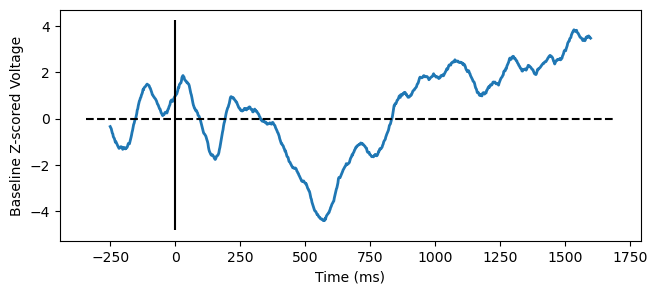

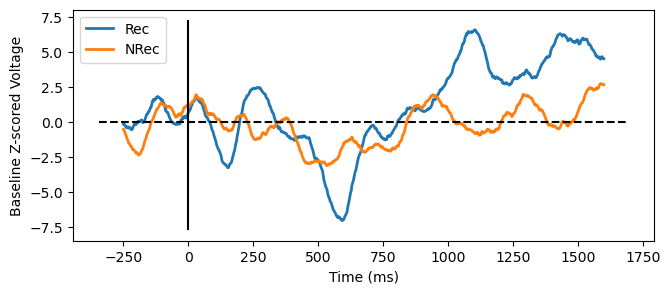

In [13]:
import numpy as np

# Load 1700ms long EEG events from 250ms before event to 1600ms after
trange = (-250, 1600)
eeg_container = reader.load_eeg(evs, trange[0], trange[1], scheme=channels)
eeg = eeg_container.data
sr = eeg_container.samplerate
event_index = round(sr*(-trange[0])/1000)
time_vals = (np.arange(eeg.shape[2])-event_index)*1000/sr

# Select word encoding events for channel 112 (as a slice), keeping events, channels, time
# Channel 112 is in the cuneus, part of the occipital lobe.
eeg = eeg[word_evs.index, 112:113]
print('avg.region:', channels.iloc[112]['avg.region'])

# Get recalled/not recalled status
# Note, the values are 0 and 1 in the database.  It is essential to turn this into a boolean array
# so that numpy will later process it as a boolean mask, and not as indices of 0 and 1 to repeatedly
# index the eeg with.
rec_status = word_evs['recalled']==True

index_200ms = round(sr*200/1000)
mu = np.mean(np.mean(eeg[:, 0, :index_200ms], 1), 0)
std_ = np.std(np.mean(eeg[:, 0, :index_200ms], 0), 0, ddof=1)

zeeg = (eeg-mu)/std_

# Plot the trace averaged across all events
plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(time_vals, np.mean(zeeg[:, 0, :], 0), linewidth=2,)
plt.vlines([0], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle='-', color='k')
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyle='--', color='k')
plt.xlabel('Time (ms)'); plt.ylabel('Baseline Z-scored Voltage')
#plt.xlim(*trange)

# Plot the trace for rec/nrec separately
plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(time_vals, np.mean(zeeg[rec_status, 0, :], 0), linewidth=2, label='Rec')
plt.plot(time_vals, np.mean(zeeg[~rec_status, 0, :], 0), linewidth=2, label='NRec')
plt.vlines([0], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle='-', color='k')
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyle='--', color='k')
plt.legend()
plt.xlabel('Time (ms)'); plt.ylabel('Baseline Z-scored Voltage')
#plt.xlim(*trange)